# Fouille de données - Présentation Jupyter Notebook

### Exemple de classification utilisant la méthode RandomForest sur le jeu de données Iris

In [1]:
from sklearn.datasets import load_iris
import pandas

# on charge les données
iris = load_iris()

# on crée un tableau avec les attributs
array = pandas.DataFrame(iris.data, columns=iris.feature_names)
array['espece'] = pandas.Categorical.from_codes(
    iris.target,
    iris.target_names
)
array.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),espece
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn.model_selection import train_test_split

# on sépare les données en un jeu de test et un jeu d'apprentissage
jeu_app, jeu_test, attributs_app, attributs_test = train_test_split(iris.data, iris.target, test_size = 0.25, random_state = 42)

print('Instances dans le jeu d\'apprentissage:', len(jeu_app))
print('Instances dans le jeu de test:', len(jeu_test))


Instances dans le jeu d'apprentissage: 112
Instances dans le jeu de test: 38


In [3]:
from sklearn.ensemble import RandomForestClassifier

# on crée un classifieur RandomForest
model = RandomForestClassifier(n_estimators=100)

# on entraîne le classifieur sur le jeu d'apprentissage
model.fit(jeu_app, attributs_app)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [4]:
# on utilise le classifieur sur le jeu de test
predictions = model.predict(jeu_test)
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [5]:
# en affichant les noms des classes prédites
iris.target_names[model.predict(jeu_test)]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype='<U10')

In [6]:
model.predict_proba(jeu_test)

array([[0.  , 0.98, 0.02],
       [0.98, 0.02, 0.  ],
       [0.  , 0.02, 0.98],
       [0.  , 1.  , 0.  ],
       [0.  , 0.88, 0.12],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.06, 0.94],
       [0.  , 0.87, 0.13],
       [0.  , 1.  , 0.  ],
       [0.  , 0.05, 0.95],
       [1.  , 0.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.92, 0.08],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.1 , 0.9 ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.05, 0.95],
       [0.  , 0.03, 0.97],
       [0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.98, 0.02, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.07, 0.93],
       [0.  , 0.99, 0.01],
 

In [7]:
from sklearn.metrics import confusion_matrix

# on affiche la matrice de confusion
confusion = confusion_matrix(attributs_test, predictions)
print(confusion)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [8]:
from sklearn.metrics import classification_report
print(classification_report(attributs_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(attributs_test, predictions)

1.0

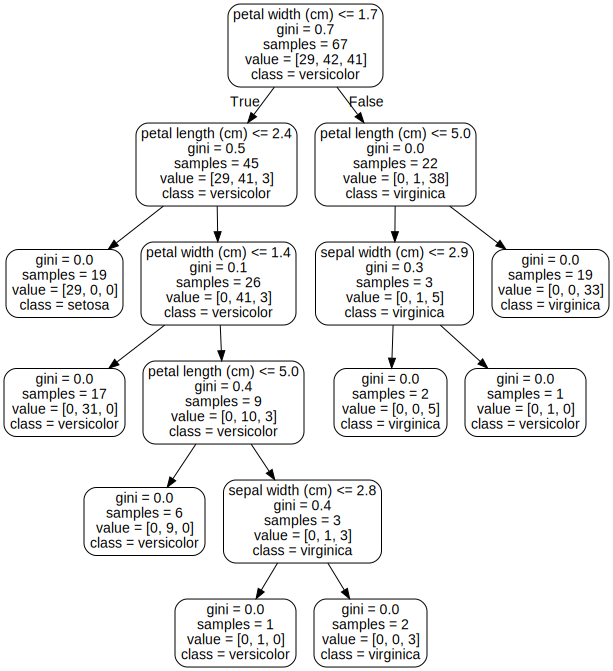

In [13]:
from sklearn.tree import export_graphviz
from IPython.display import SVG, display
from graphviz import Source

tree = model.estimators_[5]
graph = Source(export_graphviz(tree, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True, precision=1))
display(SVG(graph.pipe(format='svg')))


